In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns
import plotly

In [2]:
data = 'freedom_index.csv'

df = pd.read_csv(data)

In [3]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Year', 'Overall Score',
       'Property Rights', 'Government Integrity', 'Judicial Effectiveness',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom'],
      dtype='object')

In [92]:
df.shape

(176, 17)

In [4]:
df.head(5)

,Unnamed: 0,Country,Region,Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,0,Singapore,Asia-Pacific,2024,83.5,94.2,88.3,58.3,90.7,89.2,76.0,86.9,77.3,76.3,95.0,90.0,80.0
1,1,Switzerland,Europe,2024,83.0,94.2,91.3,98.1,70.4,64.6,95.7,89.3,60.7,80.8,86.4,85.0,80.0
2,2,Ireland,Europe,2024,82.6,93.5,83.4,94.3,78.0,82.4,91.7,91.3,62.8,74.5,79.2,90.0,70.0
3,3,Taiwan,Asia-Pacific,2024,80.0,82.2,73.4,94.0,79.2,90.5,90.3,84.9,69.1,80.1,86.4,70.0,60.0
4,4,Luxembourg,Europe,2024,79.2,96.9,84.9,95.8,64.6,40.6,97.6,89.5,57.7,69.1,79.2,95.0,80.0


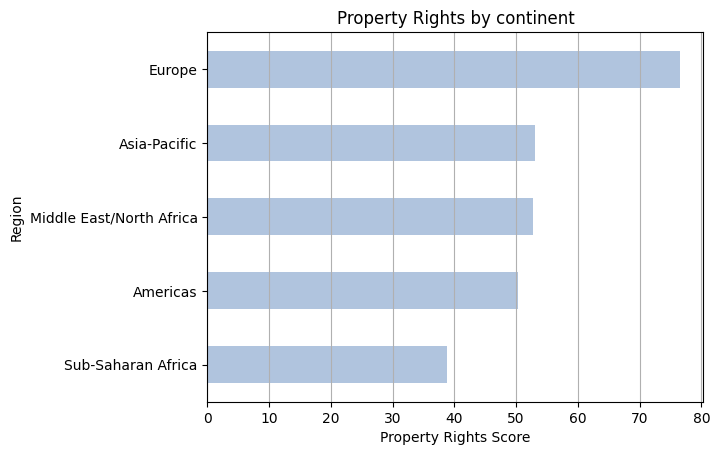

In [36]:
property_rights = df.groupby('Region')['Property Rights'].mean().sort_values() #Grouping the Property Rights column by each region (continent)

property_rights.plot(kind='barh', color='lightsteelblue')
plt.xlabel('Property Rights Score')
plt.ylabel('Region')
plt.title('Property Rights by continent')
ticks = plt.xticks() #Store the xticks function in a variable for don't show the metadata of the graph
plt.grid(axis='x') #Vertical lines (the X axis)

In [90]:
#This function filter for top 10 countries of some parameter, or also filter for the 5 continents

def freedom_data_general(region_or_country, column, n=10 ,xlabel='', ylabel='', title=''): 
    
    #region_or_country: select a column of the dataframe depending of what you wanna see, 'Region' for continents and 'Country. for countries.
    #column: select a column to compare the countries or continents each other, like 'Property Rights', 'Tax Burden', etc.
    #n=10: This variable limit the quantity of countries will be compared, later, this will be used in the iloc function to limit to 10.
    
    column = df.groupby(region_or_country)[column].mean().sort_values(ascending=False).iloc[:n]
    #This group the variable selected to compare (For example: 'Property Rights', 'Tax Burden', etc.) and group by country or region (Select the columns 'Country' or 'Region'), after, calculate the mean and sort by descending order
    #iloc[:n] uses the n parameter (that is, 10) to limit the quantity of countries will be compared
    
    #NOTE: When 'Country' is selected, each country will have only one value in the selected column, and the calculation of the .mean() will not alter any values.
    
    plt.figure(figsize=(10, 4)) 
    plt.barh(column.index, column.values, color='lightsteelblue') #Use the variable column for the position values with .index and use the same variable for the numeric values with .values
    plt.xlabel(xlabel) #The plt.xlabel() function will use the   xlabel=''   parameter in the function
    plt.ylabel(ylabel) #The plt.ylabel() function will use the   xlabel=''   parameter in the function
    plt.title(title) #The plt.title() function will use the   title=''   parameter in the function
    plt.grid(axis='x') #Vertical lines (the X axis)
    plt.gca().invert_yaxis() #Invert the axis for show first the hightest values instead the lowest
    ticks = plt.xticks() #Store the xticks function in a variable for don't show the metadata of the graph
    plt.show()

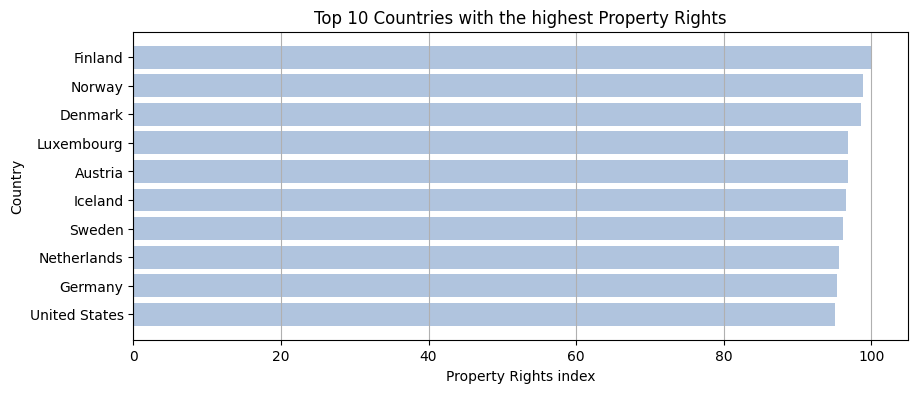

In [41]:
#Example with the 'Country' column

freedom_data_general('Country', 'Property Rights', n=10, xlabel='Property Rights index', ylabel='Country', title='Top 10 Countries with the highest Property Rights')

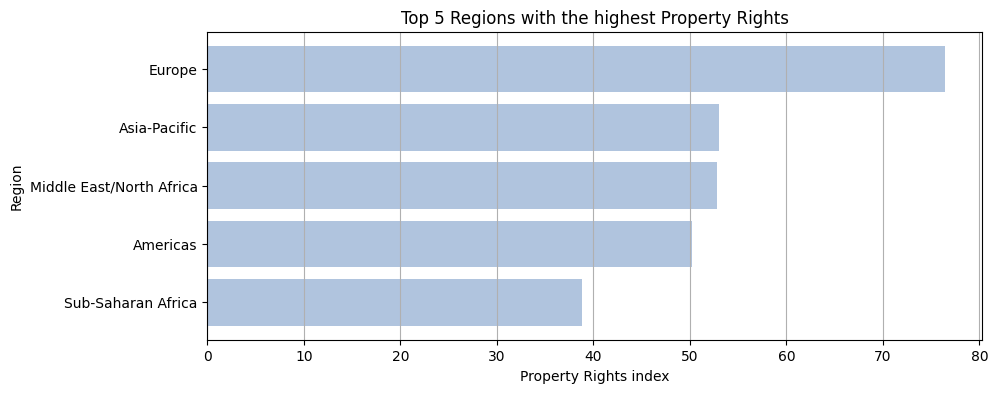

In [8]:
#Example with the 'Region' column

freedom_data_general('Region', 'Property Rights', n=10, xlabel='Property Rights index', ylabel='Region', title='Top 5 Regions with the highest Property Rights')

In [91]:
#This function show the top countries for each region for compare (For example: 'Property Rights', 'Tax Burden', etc.)

def countries_by_region(region, column, n=10, xlabel='', ylabel='', title=''): #region parameter is the region variable, explicated more later
    
    region = df[df['Region'] == region] #This select of the column 'Region' of the dataframe, the region that us provide as parameter when calling the function, and store it in the variable 'region'
    
    column_avg = region.groupby('Country')[column].mean().iloc[:n].sort_values() #This groups by the region variable, each country by the column that we select, then calculates the mean (continue reading)...
                                                                                 #Then limits the quantity of countries you wish to see, determined by the n variable, for after sorting with sort_values()
    #NOTE: When 'Country' is selected, each country will have only one value in the selected column, and the calculation of the .mean() will not alter any values.

    
    
    plt.figure(figsize=(10, 4)) #Adjusting the size of the graphs
    
    plt.barh(column_avg.index, column_avg.values, color='turquoise') #Use the variable column for the position values with .index and use the same variable for the numeric values with .values
    plt.xlabel(xlabel) #The plt.xlabel() function will use the   xlabel=''   parameter in the function
    plt.ylabel(ylabel) #The plt.ylabel() function will use the   xlabel=''   parameter in the function
    plt.title(title) #The plt.title() function will use the   title=''   parameter in the function
    plt.grid(axis='x') #Vertical lines (the X axis)
    ticks = plt.xticks() #Store the xticks function in a variable for don't show the metadata of the graph
    plt.show()

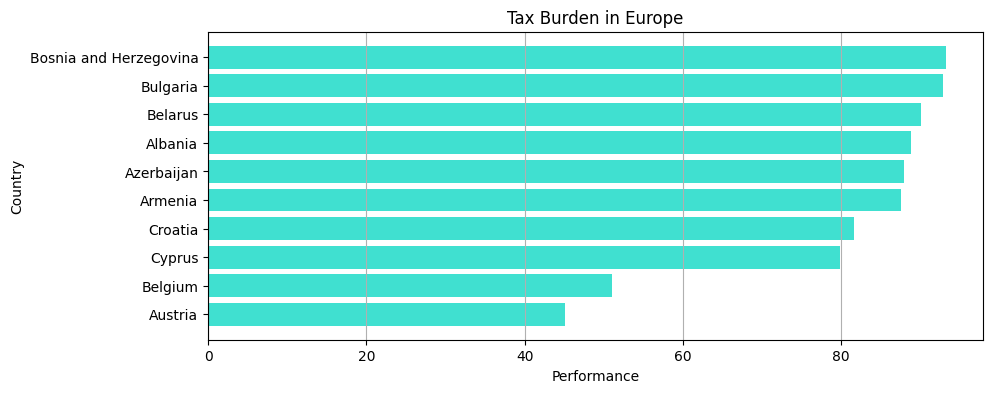

In [79]:
#Example with Europe and Tax burden

#If you wish can modificate the n parameter for view more of 10 countries

countries_by_region('Europe', 'Tax Burden', 10, xlabel='Performance', ylabel='Country', title='Tax Burden in Europe')

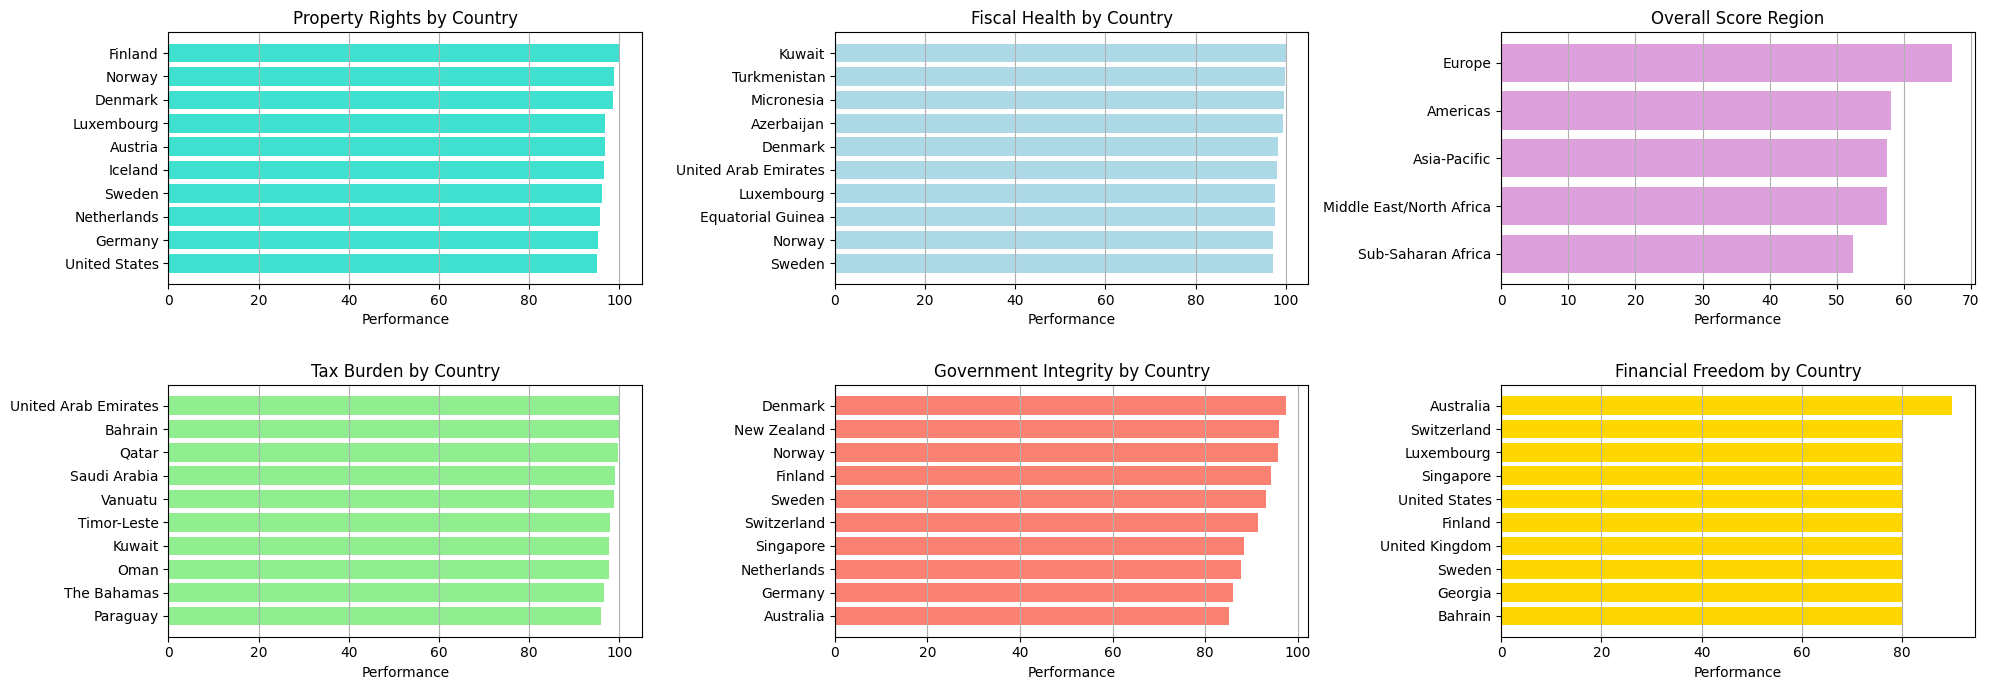

In [15]:
#This shows the best countries in each category, which is better in each one? 
#This is a manual version of a basic dashboard using subplots, later, there is a automatized function that does the same

column1 = df.groupby('Country')['Property Rights'].mean().sort_values(ascending=False).iloc[:10] 
#The column1 variable stores the data that has been grouped by 'Country' and the selected column to see and compare, sorted in descending mode and limited to 10.
#NOTE: The following variables does the same thing but with others parameters, consider the previous explanation valid for all columns

fig, axs = plt.subplots(2, 3, figsize=(20, 7)) #Adjusting the size of the graphs and the dimension of the dashboard

axs[0, 0].barh(column1.index, column1.values, color='turquoise') #This use the same variable to define the two parameters for the x and y axis, one with .index and other with .values
                                                                 #NOTE: The following lines does the same thing but with others parameters, consider the previous explanation valid for all columns 
axs[0, 0].invert_yaxis() #Invert the axis for show first the hightest values instead the lowest
axs[0, 0].set_xlabel('Performance') #The horizontal text below the graph
axs[0, 0].set_title('Property Rights by Country') #Title of the graph
axs[0, 0].grid(axis='x') #Vertical lines (the X axis)


column2 = df.groupby('Country')['Fiscal Health'].mean().sort_values(ascending=False).iloc[:10] #If you dont understand this, come back to read the previous explanation

axs[0, 1].barh(column2.index, column2.values, color='lightblue') #If you dont understand this, come back to read the previous explanation
axs[0, 1].invert_yaxis() #
axs[0, 1].set_xlabel('Performance') #
axs[0, 1].set_title('Fiscal Health by Country') #
axs[0, 1].grid(axis='x') #


column3 = df.groupby('Country')['Tax Burden'].mean().sort_values(ascending=False).iloc[:10] #

axs[1, 0].barh(column3.index, column3.values, color='lightgreen')
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Performance')
axs[1, 0].set_title('Tax Burden by Country')
axs[1, 0].grid(axis='x')


column4 = df.groupby('Country')['Government Integrity'].mean().sort_values(ascending=False).iloc[:10] #

axs[1, 1].barh(column4.index, column4.values, color='salmon')
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel('Performance')
axs[1, 1].set_title('Government Integrity by Country')
axs[1, 1].grid(axis='x')


column5 = df.groupby('Country')['Financial Freedom'].mean().sort_values(ascending=False).iloc[:10] #

axs[1, 2].barh(column5.index, column5.values, color='gold')
axs[1, 2].invert_yaxis()
axs[1, 2].set_xlabel('Performance')
axs[1, 2].set_title('Financial Freedom by Country')
axs[1, 2].grid(axis='x')


column6 = df.groupby('Region')['Overall Score'].mean().sort_values(ascending=False).iloc[:10] #

axs[0, 2].barh(column6.index, column6.values, color='plum')
axs[0, 2].invert_yaxis()
axs[0, 2].set_xlabel('Performance')
axs[0, 2].set_title('Overall Score Region')
axs[0, 2].grid(axis='x')

plt.tight_layout() #Uses tight_layout() for suring of haven't superpositions
plt.subplots_adjust(hspace=0.4) #Adjusting the space between the subplots
plt.show()

In [32]:
#This shows the best countries in each category, which is better in each one? Automatized version

def plot_dashboard_countries(df, metric1, metric2, metric3, metric4, metric5, metric6, figsize=(18, 7), n=10): 
    #Here, when the funcion be called, the function waits for the info of the 6 graphs, the first parameter 'df' is where the function will look for de data
    #NOTE: metric1, metric2, etc, corresponds to the columns that we want to see, say like 'Property Rights', 'Tax Burden', etc.
    
    fig, axs = plt.subplots(2, 3, figsize=figsize) #Adjusting the size of the graphs and the disposition of the dasboard
                                    #figsize= is equal to figsize because the figsize was defined previously in the function when was called
    
    colors = ['turquoise', 'lightblue', 'lightgreen', 'salmon', 'gold', 'plum'] #Different colors for decore the 6 graphs
    
    for i, metric in enumerate([metric1, metric2, metric3, metric4, metric5, metric6]):
        column_avg = df.sort_values(metric, ascending=False)[:n]
        #This loop iterates in each metric for sort the values in descending order and limitates the number of how many we want to show, that was defined in the n variable when the function was called
        
        ax = axs[i // 3, i % 3] #Adjusting the disposition of the dashboard and the position of the graphs
        
        ax.barh(column_avg['Country'], column_avg[metric], color=colors[i]) 
        #This creates a horizontal bar chart, using the column_avg variable, which select of the dataframe the 'Country' column
        #Then, the same variable select the metric that will being iterating in the loop
        #color=colors[i] provide in order each color of the list while the loop will executing
        
        ax.invert_yaxis() #Invert the axis for show first the hightest values instead the lowest
        ax.set_xlabel('Performance') #The horizontal text below the graph
        ax.set_title(f"{metric} by Country") #The title will be determinated by the name of the column (the metric) that will be iterated
        ax.grid(axis='x') #Vertical lines (the X axis)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.6) #Adjusting the space between the subplots
    plt.tight_layout() #Uses tight_layout() for suring of haven't superpositions
    plt.show()

In [88]:
#This separates the mean of each continent by category (like 'Property Rights', 'Tax Burden', etc.). 

def plot_dashboard_regions(df, metric1, metric2, metric3, metric4, metric5, metric6, figsize=(18, 7), n=5):
    #Here, when the funcion be called, the function waits for the info of the 6 graphs, the first parameter 'df' is where the function will look for de data
    #NOTE: metric1, metric2, etc, corresponds to the columns that we want to see, say like 'Property Rights', 'Tax Burden', etc.

    fig, axs = plt.subplots(2, 3, figsize=figsize)#Adjusting the size of the graphs and the disposition of the dasboard
                                    #figsize= is equal to figsize because the figsize was defined previously in the function when was called
    
    colors = ['turquoise', 'lightblue', 'lightgreen', 'salmon', 'gold', 'plum'] #Different colors for decore the 6 graphs
    
    for i, metric in enumerate([metric1, metric2, metric3, metric4, metric5, metric6]): 
        column_avg = df.groupby('Region')[metric].mean().sort_values(ascending=False)[:n]
        #This loop iterates in each metric. Then, will group by region for each parameter(metric like 'Property Rights', 'Tax Burden', etc.) that we passed in the function when was called
        #Then, calculates the mean for each region, then will be sorted in descending mode
        #NOTE: In this function the n parameter works for if we need to compare less than 5 regions, ej: Top 3, top 2, etc.
        
        ax = axs[i // 3, i % 3] #Adjusting the disposition of the dashboard and the position of the graphs
        
        ax.barh(column_avg.index, column_avg.values, color=colors[i])
        #This creates a horizontal bar chart, using the column_avg variable, which select of the dataframe the 'Region' column
        #Then, the same variable select the metric that will being iterating in the loop
        #color=colors[i] provide in order each color of the list while the loop will executing
        
        ax.invert_yaxis() #Invert the axis for show first the hightest values instead the lowest
        ax.set_xlabel('Performance') #The horizontal text below the graph
        ax.set_title(f"{metric} by Region") #The title will be determinated by the name of the column (the metric) that will be iterated
        ax.grid(axis='x') #Vertical lines (the X axis)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.6) #Adjusting the space between the subplots
    plt.tight_layout() #Uses tight_layout() for suring of haven't superpositions
    plt.show()

# --------------------------- DASHBOARDS ---------------------------

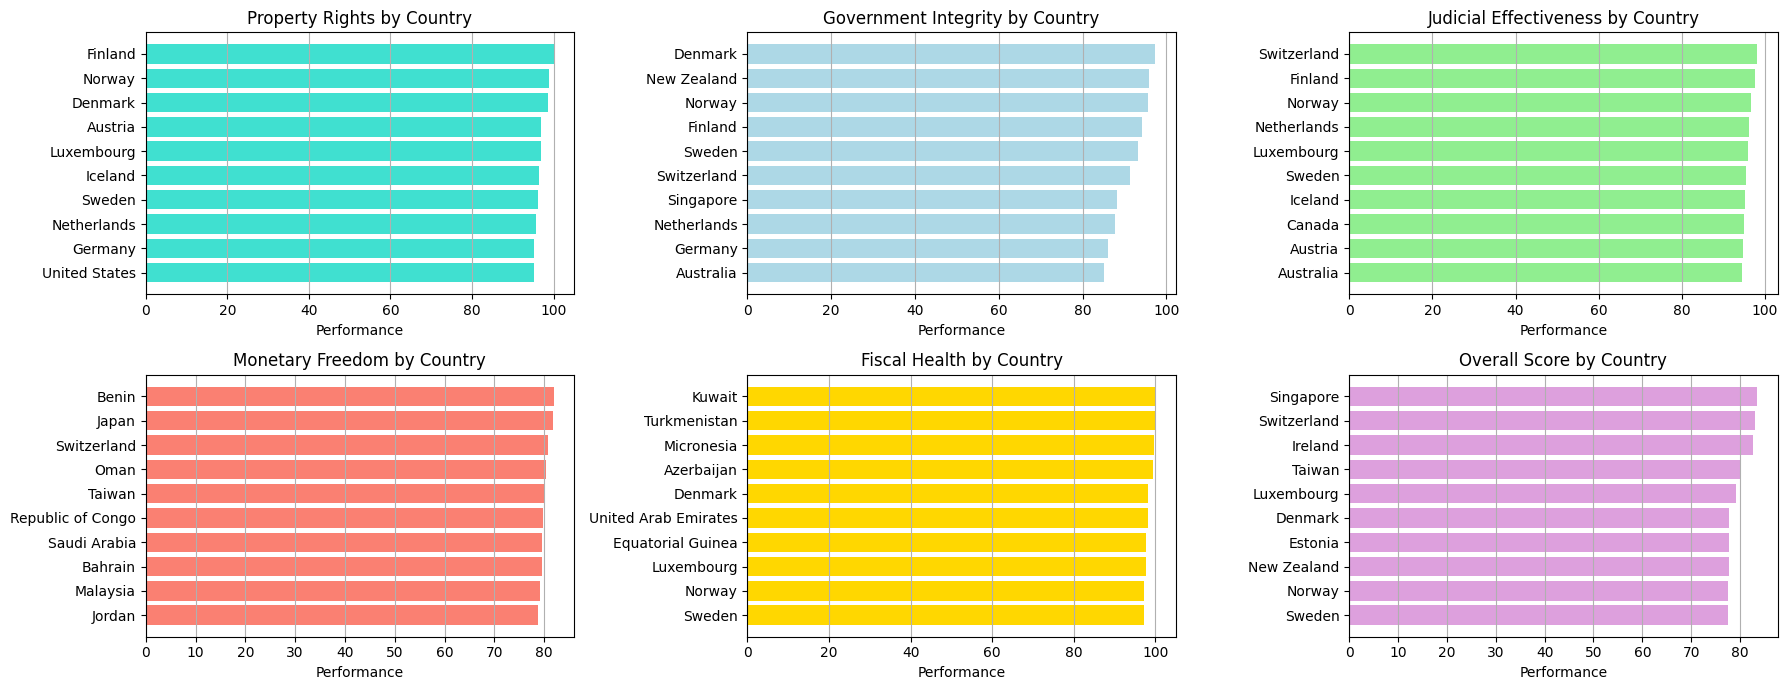

In [30]:
plot_dashboard_countries(df, 'Property Rights', 'Government Integrity', 'Judicial Effectiveness', 'Monetary Freedom', 'Fiscal Health', 'Overall Score')

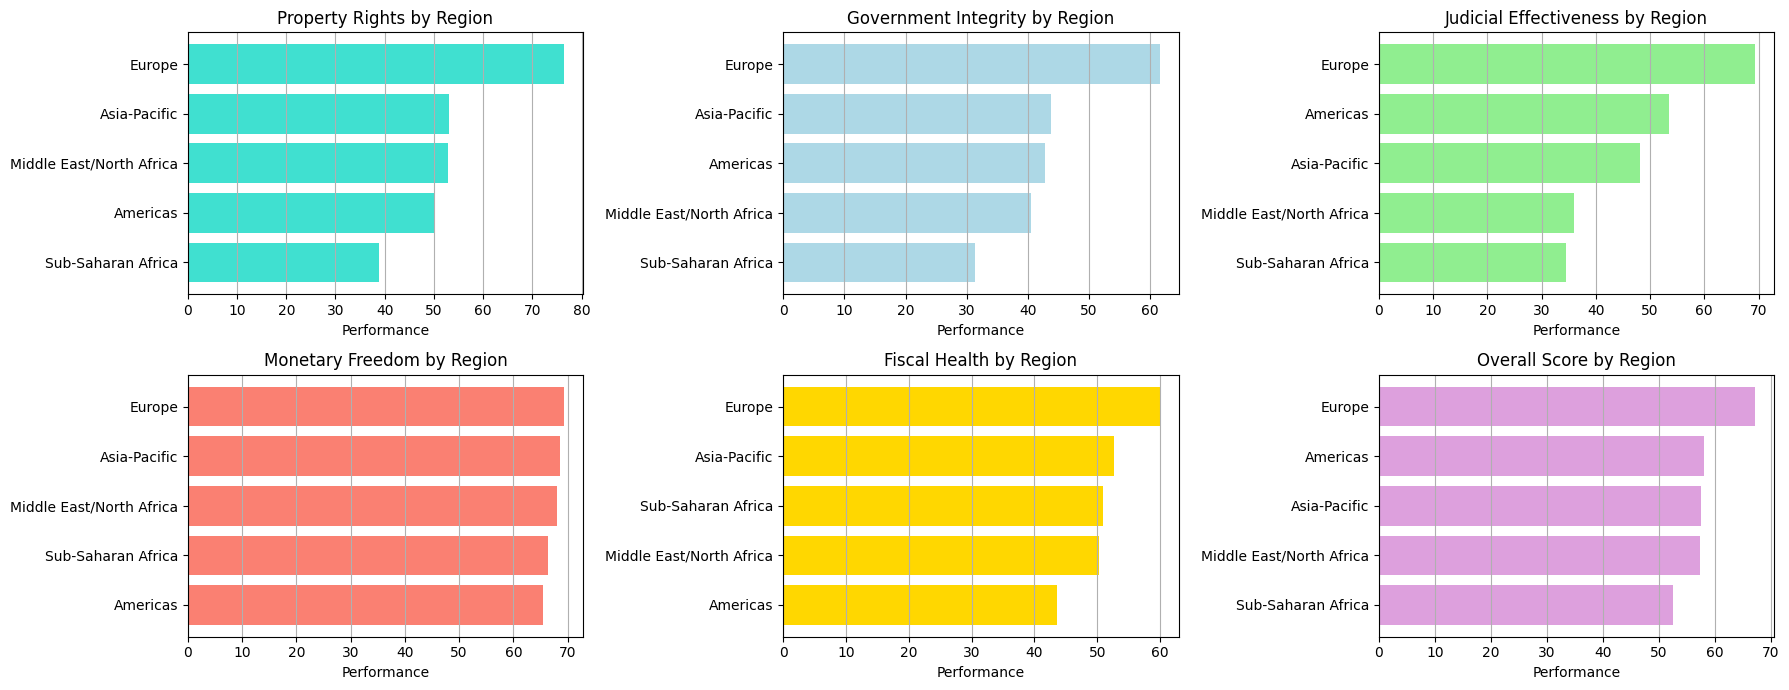

In [89]:
plot_dashboard_regions(df, 'Property Rights', 'Government Integrity', 'Judicial Effectiveness', 'Monetary Freedom', 'Fiscal Health', 'Overall Score')